<img src="http://i67.tinypic.com/2jcbwcw.png" align="left"></img><br><br><br><br>


## NOTEBOOK: Minimizing Risk of False Positives in Classification

**Example notebook:** Manipulating the binary classification threshold in Logistic Regression (probability between classes) to minimize the number of False Positives.

**Author List**: Alexander Fred Ojala (Fall 2017)

**License**: Feel free to do whatever you want to with this code

In [1]:
# Load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

%matplotlib inline

In [2]:
# Load iris data set

df = pd.DataFrame(load_iris()['data'],columns=load_iris()['feature_names'])
df = df.iloc[:,0:2] # only look at two features, for visualization
y = load_iris().target # target variable
df['y_target'] = y

In [3]:
# Cast it as a BINARY CLASSIFICATION problem (only include )

idx = np.where(y==1)[0][0]
df = df.iloc[idx:,:]

In [4]:
# Label targets as 0, 1 instead of 1, 2
df['y_target'] = df['y_target'] - 1
df['y_target'].unique()

array([0, 1])

In [5]:
df.head()

,sepal length (cm),sepal width (cm),y_target
50,7.0,3.2,0
51,6.4,3.2,0
52,6.9,3.1,0
53,5.5,2.3,0
54,6.5,2.8,0


In [6]:
# Drop duplicates so that we don't plot data on top of each other

df = df.drop_duplicates(subset=df.columns[0:2])

In [7]:
# Assign X and Y

df_x = df.iloc[:,:2]
y = df['y_target']

In [8]:
# Fit logistic regression model to the data that is not regularized

logreg = LogisticRegression(C=10^6)
logreg.fit(df_x,y);

In [9]:
print('Accuracy on the training set:')
print(str(np.round(logreg.score(df_x,y),4)*100)+'%')

Accuracy on the training set:
69.23%


In [10]:
# Manual accuracy test

sum(logreg.predict(df_x)==y)/len(y)

0.69230769230769229

In [11]:
# Plot decision boundary, calculate Confusion Matrix, False Positives, and ROC statistics

def plot_boundary(X,Y,prob_class1=None):
    
    X = X.values

    h = .01  # step size in the mesh
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    if prob_class1:
        Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = Z[:,1]>prob_class1
        Z = Z.astype(int)
    else:
        Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(6, 4),dpi=150)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,alpha=.8, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Predictor A')
    plt.ylabel('Predictor B')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.title('Blue = 0 (No, Negative), Orange = 1 (Yes, Positive)')

    plt.suptitle('Can I eat this Flower\n')
    plt.show()
    
    # False-positive ratio
    if prob_class1:
        pred_prob = logreg.predict_proba(X)
        pred = pred_prob[:,1]>prob_class1
        pred = pred.astype(int)
    else:
        pred_prob = logreg.predict_proba(X)
        pred = logreg.predict(X)
    
    conf_mat = confusion_matrix(y, pred)
    
    
    fpr, tpr, thresholds = roc_curve(y, pred_prob[:,1], pos_label=1)
    
    ## ---- This can be left out ---
    if prob_class1:
    
        def evaluate_threshold(threshold):
            print('Sensitivity:', tpr[thresholds > threshold][-1])
            print('Specificity:', 1 - fpr[thresholds > threshold][-1])
            print('ROC AUC: ' + str(roc_auc_score(y, pred_prob[:,1])))
            print()
        evaluate_threshold(prob_class1)
        
    ## ---- This can be left out ----
    
    
    print('Prediction Accuracy = ' + str(sum(pred==y)/len(y)))
    print('Number of False Positives (misclassified blue points): ' +str(conf_mat[0,1]))
    print()
    print('Confusion Matrix:')
    return pd.DataFrame(conf_mat,columns=\
                        ['Pred Negative','Pred Positive'],index=['Actual Negative','Actual Positive'])

    

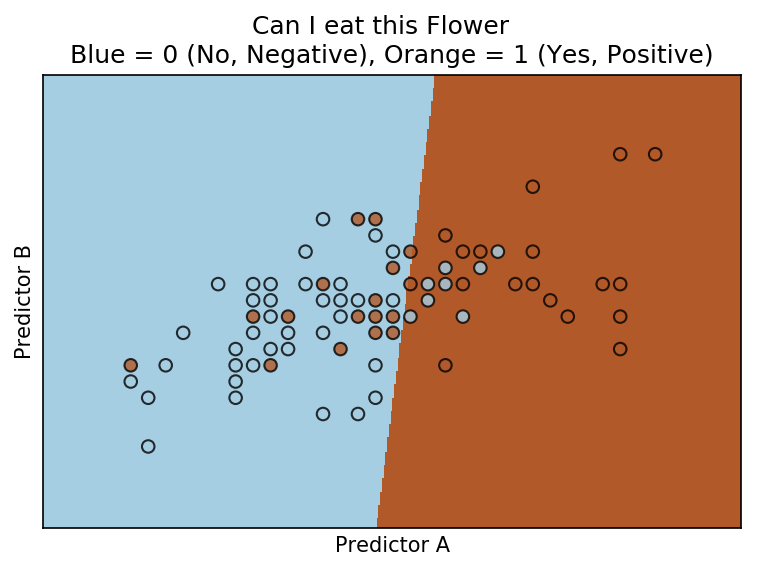

Prediction Accuracy = 0.692307692308
Number of False Positives (misclassified blue points): 8

Confusion Matrix:


,Pred Negative,Pred Positive
Actual Negative,36,8
Actual Positive,16,18


In [12]:
# Plot Decision Boundary 
# (The color of the circles indicate the true class of the data samples)
# The background color indicates the prediction regions for the two classes
#
# A blue circle on the orange area indicates a False Positive prediction

plot_boundary(df_x,y) # threshold = 0.5 for the logit / sigmoid function

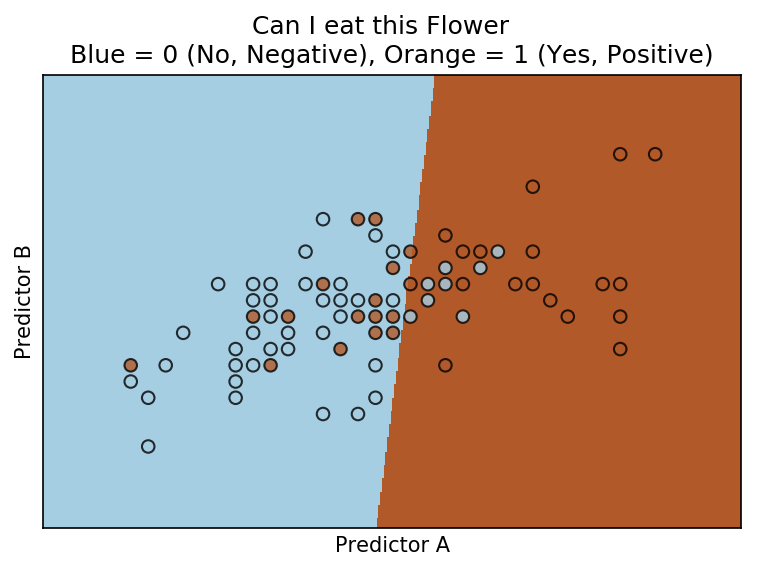

Sensitivity: 0.5
Specificity: 0.818181818182
ROC AUC: 0.799465240642

Prediction Accuracy = 0.692307692308
Number of False Positives (misclassified blue points): 8

Confusion Matrix:


,Pred Negative,Pred Positive
Actual Negative,36,8
Actual Positive,16,18


In [13]:
# Same as above, only showing that prob_class1 works

plot_boundary(df_x,y,prob_class1=0.5)

# Changing the Threshold to 0.66

### No we have to be over 66% certain that we can eat the flower (instead of 50%)

##### (Note that the prediction accuracy increases! However, that might not be optimal for out-of-sample data)

.

<div class='alert alert-warning'>We would like to <b>minimize the risk of eating a toxic flower</b> (no False Positives, i.e. `correctly classify all blue dots`) </div>

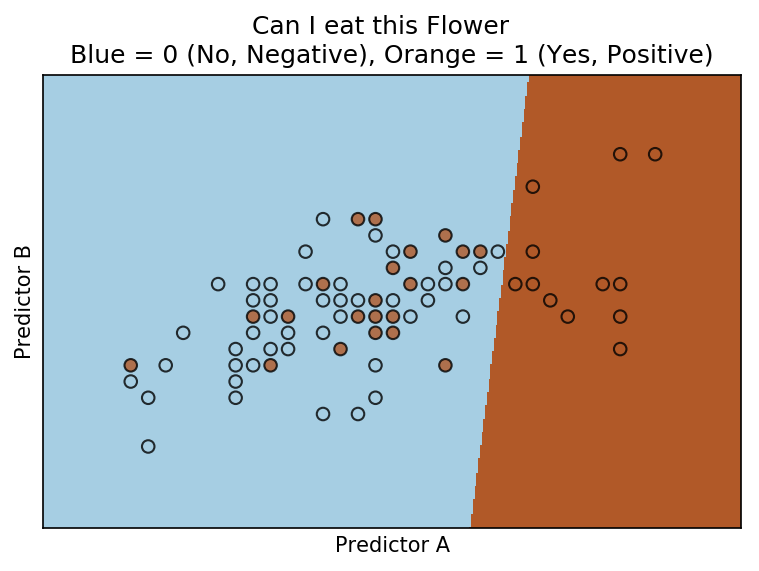

Sensitivity: 0.352941176471
Specificity: 1.0
ROC AUC: 0.799465240642

Prediction Accuracy = 0.717948717949
Number of False Positives (misclassified blue points): 0

Confusion Matrix:


,Pred Negative,Pred Positive
Actual Negative,44,0
Actual Positive,22,12


In [14]:
# Minmize number of False Positives

plot_boundary(df_x,y,prob_class1=0.66)